# Workshop
# Least Square Regression

------------------
## Problem 01

#### A) Find the least square regression line for the following set of data

| $i$ | 1 | 2 | 3 | 4 | 5 |
|---|------|------|------|-------|-------|
| $x_i$ | 2.10 | 6.22 | 7.17 | 10.52 | 13.68 |
| $y_i$ | 2.90 | 3.83 | 5.98 | 5.71  | 7.74  |

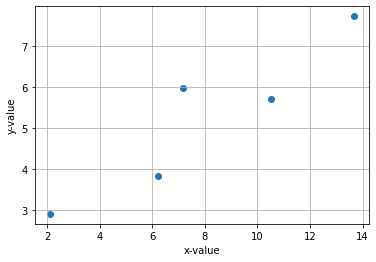

In [30]:
import numpy as np
import matplotlib.pyplot as plt


data_x = np.array([2.10, 6.22, 7.17, 10.52, 13.68])
data_y = np.array([2.90, 3.83, 5.98, 5.71, 7.74])
plt.scatter(data_x, data_y)
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.grid()
plt.show()

#### Linear Regression Model
$$ \hat{Y} = XB = \begin{bmatrix} 1 & X_1 \\ 1 & X_2 \\ \vdots & \vdots \\ 1 & X_n \end{bmatrix}\begin{bmatrix} B_0 \\ B_1 \end{bmatrix}, $$
where 
$$ B = (X^{T}X)^{-1}X^{T}Y $$

In [31]:
n = data_x.shape[0]
ones = np.ones((n, 1))
X = np.concatenate((ones, data_x.reshape(n,1)), axis=1)
Y = data_y.reshape(n, 1)

print(f'X = \n {X}')
print(f'Y = \n {Y}')

X = 
 [[ 1.    2.1 ]
 [ 1.    6.22]
 [ 1.    7.17]
 [ 1.   10.52]
 [ 1.   13.68]]
Y = 
 [[2.9 ]
 [3.83]
 [5.98]
 [5.71]
 [7.74]]


In [56]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(B)

[[0.2750403 ]
 [0.00165569]]


In [33]:
print(f'yhat = {B[0]} + {B[1]} * x')

yhat = [2.03839178] + [0.402319] * x


In [34]:
def model_p1(x):
    yhat = B[0] + B[1]*x
    return yhat

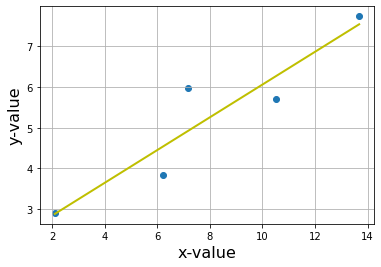

In [35]:
yhat = model_p1(data_x)

plt.scatter(data_x, data_y)
plt.xlabel('x-value', fontsize=16)
plt.ylabel('y-value', fontsize=16)
plt.grid()

plt.plot(data_x, yhat, c='y', lw=2, label='Regression Line')

plt.show()

#### B) Find the sum of squres of residuals about regrssion line

$$ S_r = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  $$

In [36]:
y = data_y
print(y)
print(yhat)

S_r = sum((y-yhat) ** 2)

print(f'S_r = {S_r}')


[2.9  3.83 5.98 5.71 7.74]
[2.88326168 4.54081596 4.92301901 6.27078766 7.5421157 ]
S_r = 1.9763893093632898


#### C) Find the standard error of estimate

$$ S_{y/x} = \sqrt{\dfrac{S_r}{n-2}} $$

In [37]:
S_yx = np.sqrt(S_r/(n-2))

print(f'S_yx = {S_yx}')

S_yx = 0.8116627602979146


#### D) Find sum of squares of residuals about the mean
$$ S_t = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

In [38]:
print(y)
print(np.average(y))

ybar = np.average(y)
S_t = sum((y - ybar) ** 2)

print(f'S_t = {S_t}')

[2.9  3.83 5.98 5.71 7.74]
5.232000000000001
S_t = 14.48188


#### E) Find the coeﬀicient of determination
$$ r^2 = \dfrac{S_t - S_r}{S_t} $$

In [39]:
r2 = (S_t - S_r)/S_t

print(f'r2 = {r2}')

r2 = 0.8635267444997963


#### F) Find the correlation coeﬀicient
$$ r = \sqrt{\dfrac{S_t - S_r}{S_t}}$$

In [40]:
r = np.sqrt(r2)

print(f'r = {r}')

r = 0.9292613972934614


------------------
## Problem 02

The sales of a company (in million Baht) for each year are shown in the table below.

|  |  |  |  |  |  |
|---|------|------|------|-------|-------|
| $x$ (year) | 2016 | 2017 | 2018 | 2019 | 2020 |
| $y$ (sales) | 12 | 19 | 29 | 37  | 45  |

#### A) Find the least square regression line. 

#### B) Find the coeﬀicient of determination

#### C) Use the least squares regression line as a model to estimate the sales of the company in 2021. 

------------------
## Problem 03

Use the dataset ```dataset_prob_03.csv```, to answer the following questions.

#### A) Find a regression model to predict GPA based on SAT scores

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('dataset_prob_03.csv')
data

SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]

In [42]:
data_x = data['SAT'].to_numpy()
data_y = data['GPA'].to_numpy()

print(data_x)
print(data_y)

[1714 1664 1760 1685 1693 1670 1764 1764 1792 1850 1735 1775 1735 1712
 1773 1872 1755 1674 1842 1786 1761 1722 1663 1687 1974 1826 1787 1821
 2020 1794 1769 1934 1775 1855 1880 1849 1808 1954 1777 1831 1865 1850
 1966 1702 1990 1925 1824 1956 1857 1979 1802 1855 1907 1634 1879 1887
 1730 1953 1781 1891 1964 1808 1893 2041 1893 1832 1850 1934 1861 1931
 1933 1778 1975 1934 2021 2015 1997 2020 1843 1936 1810 1987 1962 2050]
[2.4  2.52 2.54 2.74 2.83 2.91 3.   3.   3.01 3.01 3.02 3.07 3.08 3.08
 3.12 3.17 3.17 3.17 3.17 3.19 3.19 3.19 3.2  3.21 3.24 3.28 3.28 3.28
 3.28 3.28 3.28 3.28 3.29 3.29 3.29 3.31 3.32 3.34 3.37 3.37 3.37 3.38
 3.38 3.39 3.39 3.4  3.4  3.4  3.41 3.41 3.41 3.42 3.42 3.42 3.44 3.47
 3.47 3.47 3.47 3.48 3.49 3.49 3.5  3.51 3.51 3.52 3.52 3.54 3.58 3.58
 3.59 3.59 3.6  3.6  3.61 3.62 3.64 3.65 3.71 3.71 3.71 3.73 3.76 3.81]


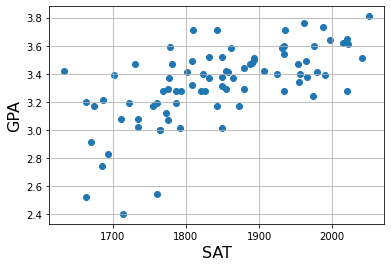

In [43]:
plt.scatter(data_x, data_y)
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.grid()
plt.show()

In [44]:
n = data_x.shape[0]
ones = np.ones((n, 1))
X = np.concatenate((ones, data_x.reshape(n,1)), axis=1)
Y = data_y.reshape(n, 1)
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B

array([[0.2750403 ],
       [0.00165569]])

In [46]:
print(f'yhat = {B[0]} + {B[1]} * x')

yhat = [0.2750403] + [0.00165569] * x


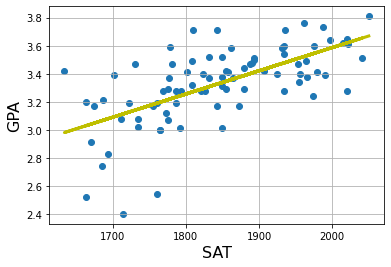

In [55]:
def model_p3(x):
    yhat = B[0] + B[1]*x
    return yhat

yhat = model_p3(data_x)

plt.scatter(data_x, data_y)
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.grid()

plt.plot(data_x, yhat, c='y', lw=3, label='Regression Line')

plt.show()

#### B) Find the coeﬀicient of determination

In [48]:
y = data_y
S_r = sum((y-yhat) ** 2)
ybar = np.average(y)
S_t = sum((y - ybar) ** 2)
r2 = (S_t - S_r)/S_t

print(f'r2 = {r2}')

r2 = 0.4060039147967976


#### C) Use the model to predict GPA of a student with 1,845 SAT score.

In [49]:
x = 1845
yhat = model_p3(x)
print(f'yhat = {yhat}')

yhat = [3.32978475]


------------------
## Problem 04

Use the dataset ```dataset_prob_04.csv```, to answer the following questions.

#### A) Find a regression model to predict score based on hours of study.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('dataset_prob_04.csv')
data

HOUR      SCORE
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]

#### B) Find the coeﬀicient of determination

#### C) Use the model to predict score of a student with 50 hours of study.